->Random forrest can be applied to regresor and classification.

->It's performance can be improved without excessive hyperparameter tuning.

Why "random" "forrest" ??

Group of decision trees. And random forrest is a bagging technique.

**Bagging with the base_model being decision trees is random forrest.**

**Bagging**:

We sample limited number of rows from the data set and randomly select nth model from the given number of models and pass the sampled data(with and without replacement).

two types->
1. row sampling(limited data)
2. column sampling(limited features)
3. combination of both the samplings.

we than take the aggregation of the results and give the output.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
x,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)
df=pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.018537,3.566320,-0.994519,0.699093,-1.373746,0
1,-1.925414,-2.634641,-0.081972,-0.328240,-1.187493,1
2,0.532762,-1.751055,-0.576454,3.546148,-2.604732,0
3,-0.279574,-0.939080,1.125909,0.762651,-0.893632,1
4,-2.093053,-1.033193,4.321169,0.646864,2.085990,0


In [3]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)
def sample_features(df:pd.DataFrame,percent):
    cols=df.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]))
    return df[cols]
def combined_sampling(df:pd.DataFrame,row_percent,col_percent):
    cols=cols=df.sample(df.columns.tolist()[:-1],int(col_percent*df.shape[1]))
    return df[cols].sample(int(row_percent*df.shape[0]),replace=True)

In [4]:
sample1=sample_rows(df,0.2)
sample2=sample_rows(df,0.2)
sample3=sample_rows(df,0.2)
sample1

,col1,col2,col3,col4,col5,target
28,1.501988,0.943518,2.073313,0.753751,-0.161663,1
0,3.018537,3.566320,-0.994519,0.699093,-1.373746,0
58,-1.612847,-1.326743,1.577156,1.120132,-1.649725,1
65,0.978516,0.912553,1.685456,1.990619,0.035322,1
59,3.922147,1.219344,-2.251208,2.826086,-3.798534,0
81,-1.171045,0.551478,0.521393,4.271539,-0.075373,1
60,-1.410863,0.006160,2.565826,0.998737,-0.542477,0
17,1.810631,0.998408,-0.290875,1.493588,-2.704617,0
38,-2.902947,-2.961665,0.800004,-0.446129,-2.311692,1
1,-1.925414,-2.634641,-0.081972,-0.328240,-1.187493,1


[Text(0.3333333333333333, 0.875, 'x[1] <= -0.509\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.5, 0.625, 'x[4] <= -0.352\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6666666666666666, 0.375, 'x[3] <= 0.575\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

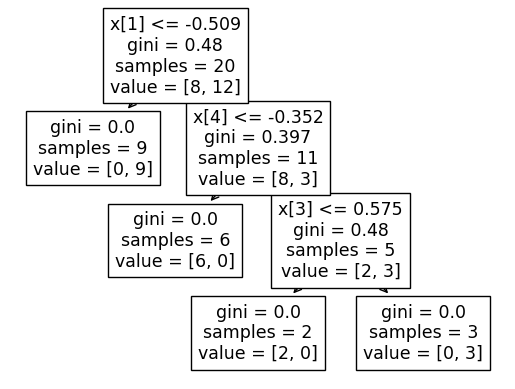

In [5]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()
clf1.fit(sample1.iloc[:,0:5],sample1.iloc[:,5])
clf2.fit(sample2.iloc[:,0:5],sample2.iloc[:,5])
clf3.fit(sample3.iloc[:,0:5],sample3.iloc[:,5])
plot_tree(clf1)

# problems:

**LB HV algos**

fully grown decision trees

SVM

KNN

**HB LV**

LR

# Random forrests converts LB HV to LB LVar

The difference between bagging and Random forrest????

**Sampling in random forrest is row and column and in bagging of Decision tree,we can only use row sampling or column sampling.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df=pd.read_csv(r'c:\Users\ASUS\Desktop\Ma_ler\Dsets\heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model=SVC()
model.fit(x_train,y_train)
res=model.predict(x_test)
print(accuracy_score(y_test,res))
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
res=model.predict(x_test)
print(accuracy_score(y_test,res))

0.6557377049180327
0.8032786885245902


In [8]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
res=model.predict(x_test)
print(accuracy_score(y_test,res))
np.mean(cross_val_score(RandomForestClassifier(),X,Y,cv=10,scoring='accuracy'))

0.7377049180327869


0.8281720430107526

# Hyperparameter tuning:

In [9]:
%%time

n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]
param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'max_samples':max_samples}
rd=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
model_grid=GridSearchCV(estimator=rd,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: total: 1.53 s
Wall time: 17.8 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [10]:
print(model_grid.best_params_)
model_grid.best_score_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 20}


0.851190476190476

# Random search CV

In [11]:
from sklearn.model_selection import RandomizedSearchCV
model_=RandomForestClassifier()
model_rs=RandomizedSearchCV(estimator=model_,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1,n_iter=50)
model_rs.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [12]:
print(model_rs.best_params_)
model_rs.best_score_

{'n_estimators': 20, 'max_samples': 0.75, 'max_features': 0.6, 'max_depth': 2}


0.8471938775510204

#  OOB evaluation:
# "Out of bag evaluation"

when you perform bootstrapping with replacement,the samples which are not picked up by decision trees are Out of bag samples. (37% of the data is OB samples after fitting).

these samples can be then used to perform testing.

In [14]:
model=RandomForestClassifier(oob_score=True)
model.fit(x_train,y_train)
model.oob_score_  # accuracy score of ob samples 

0.8223140495867769

In [16]:
res=model.predict(x_test)
print(accuracy_score(res,y_test))

0.7213114754098361
